In [2]:
import numpy as np
import pandas as pd

In [132]:
import chardet

# Detect encoding
with open('output.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Print detected encoding
print(result['encoding'])

# Use the detected encoding when reading the CSV file
df = pd.read_csv('output.csv')


utf-8


In [4]:
df.sample(5)

,text,type
47,\n\n\n\n\n\n\n\n\n\nMata Sudarshan Tilak Raj D...,not_cybercrime
25,\n\n\n\n\n\n\n\n\n\nChinonso Roy Akata vs Stat...,cybercrime
8,\n\n\n\n\n\n\n\n\n\nH.Srilekha vs Assistant Co...,cybercrime
53,\n\n\n\n\n\n\n\n\n\nUnion Of India & Ors vs Su...,not_cybercrime
7,\n\n\n\n\n\n\n\n\n\nBrinda Karat & Anr. vs Sta...,cybercrime


In [5]:
df.shape

(54, 2)

In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    54 non-null     object
 1   type    54 non-null     object
dtypes: object(2)
memory usage: 996.0+ bytes


In [252]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

KeyError: "['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] not found in axis"

In [7]:
df.sample(5)

,text,type
36,\n\n\n\n\n\n\n\n\n\nM/S N.N. Global Mercantile...,not_cybercrime
49,\n\n\n\n\n\n\n\n\n\nMohd Naushad vs State Of (...,not_cybercrime
10,\n\n\n\n\n\n\n\n\n\nShiv Kumar vs The State Of...,cybercrime
23,\n\n\n\n\n\n\n\n\n\nGoogle India Private Limit...,cybercrime
21,\n\n\n\n\n\n\n\n\n\nMohit Panwar & Ors. vs Air...,cybercrime


In [8]:
# renaming the cols
df.rename(columns={'type':'target'},inplace=True)
df.sample(5)

,text,target
33,\n\n\n\n\n\n\n\n\n\nDr. Lalit Surajmal Kanodia...,not_cybercrime
31,\n\n\n\n\n\n\n\n\n\nDebikay Information Techno...,not_cybercrime
29,\n\n\n\n\n\n\n\n\n\nSukdeen Khan vs State Of U...,cybercrime
12,\n\n\n\n\n\n\n\n\n\nState By Cyber Crime Polic...,cybercrime
38,\n\n\n\n\n\n\n\n\n\nNaz Foundation vs Governme...,not_cybercrime


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,text,target
0,\n\n\n\n\n\n\n\n\n\nPallabh Bhowmick vs The Om...,0
1,\n\n\n\n\n\n\n\n\n\nSanjay Singh vs State Of U...,0
2,\n\n\n\n\n\n\n\n\n\nSukdeen Khan vs State Of U...,0
3,\n\n\n\n\n\n\n\n\n\nRinku Singh @ Deepak Kumar...,0
4,\n\n\n\n\n\n\n\n\n\nDaksh vs Unknown on 1 July...,0


In [12]:
# missing values
df.isnull().sum()

text      0
target    0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

2

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(52, 2)

## 2.EDA

In [17]:
df.head()

,text,target
0,\n\n\n\n\n\n\n\n\n\nPallabh Bhowmick vs The Om...,0
1,\n\n\n\n\n\n\n\n\n\nSanjay Singh vs State Of U...,0
2,\n\n\n\n\n\n\n\n\n\nSukdeen Khan vs State Of U...,0
3,\n\n\n\n\n\n\n\n\n\nRinku Singh @ Deepak Kumar...,0
4,\n\n\n\n\n\n\n\n\n\nDaksh vs Unknown on 1 July...,0


In [18]:
df['target'].value_counts()

target
0    29
1    23
Name: count, dtype: int64

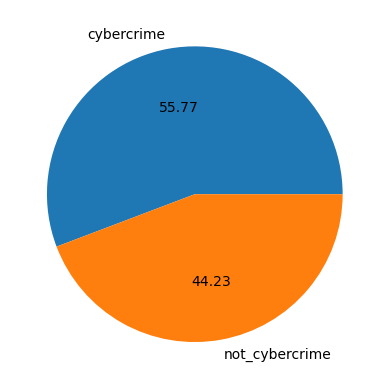

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['cybercrime','not_cybercrime'],autopct="%0.2f")
plt.show()

In [34]:
# Data is imbalanced

In [20]:
import nltk

In [21]:
!pip install nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/supornosarkar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,text,target,num_characters
0,\n\n\n\n\n\n\n\n\n\nPallabh Bhowmick vs The Om...,0,40993
1,\n\n\n\n\n\n\n\n\n\nSanjay Singh vs State Of U...,0,3117
2,\n\n\n\n\n\n\n\n\n\nSukdeen Khan vs State Of U...,0,5948
3,\n\n\n\n\n\n\n\n\n\nRinku Singh @ Deepak Kumar...,0,58272
4,\n\n\n\n\n\n\n\n\n\nDaksh vs Unknown on 1 July...,0,18343


In [25]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,text,target,num_characters,num_words
0,\n\n\n\n\n\n\n\n\n\nPallabh Bhowmick vs The Om...,0,40993,6830
1,\n\n\n\n\n\n\n\n\n\nSanjay Singh vs State Of U...,0,3117,552
2,\n\n\n\n\n\n\n\n\n\nSukdeen Khan vs State Of U...,0,5948,1095
3,\n\n\n\n\n\n\n\n\n\nRinku Singh @ Deepak Kumar...,0,58272,7821
4,\n\n\n\n\n\n\n\n\n\nDaksh vs Unknown on 1 July...,0,18343,3084


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,\n\n\n\n\n\n\n\n\n\nPallabh Bhowmick vs The Om...,0,40993,6830,313
1,\n\n\n\n\n\n\n\n\n\nSanjay Singh vs State Of U...,0,3117,552,26
2,\n\n\n\n\n\n\n\n\n\nSukdeen Khan vs State Of U...,0,5948,1095,35
3,\n\n\n\n\n\n\n\n\n\nRinku Singh @ Deepak Kumar...,0,58272,7821,344
4,\n\n\n\n\n\n\n\n\n\nDaksh vs Unknown on 1 July...,0,18343,3084,139


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,52.000000,52.000000,52.000000
mean,84994.365385,13516.269231,498.884615
std,99517.632877,16375.897451,583.294183
min,3117.000000,552.000000,26.000000
25%,17327.500000,2566.000000,95.500000
50%,55803.000000,7815.000000,323.500000
75%,107976.000000,16732.500000,592.500000
max,485859.000000,83606.000000,2699.000000


In [30]:
# cybercrime
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,29.000000,29.000000,29.000000
mean,57016.724138,8604.068966,327.137931
std,58524.777206,8738.943782,333.374385
min,3117.000000,552.000000,26.000000
25%,16312.000000,2143.000000,94.000000
50%,25217.000000,3598.000000,158.000000
75%,86378.000000,14852.000000,439.000000
max,206547.000000,31474.000000,1282.000000


In [31]:
#not_cybercrime
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,23.000000,23.000000,23.000000
mean,120270.521739,19709.913043,715.434783
std,127540.807188,21273.399130,747.905793
min,3117.000000,552.000000,26.000000
25%,26230.000000,4613.500000,162.500000
50%,64275.000000,10455.000000,467.000000
75%,183788.500000,28867.500000,1088.000000
max,485859.000000,83606.000000,2699.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

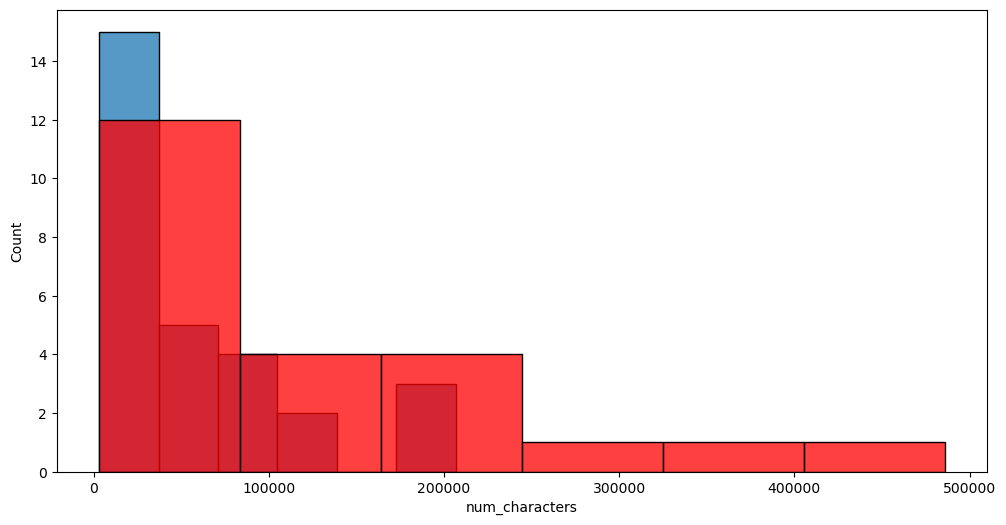

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

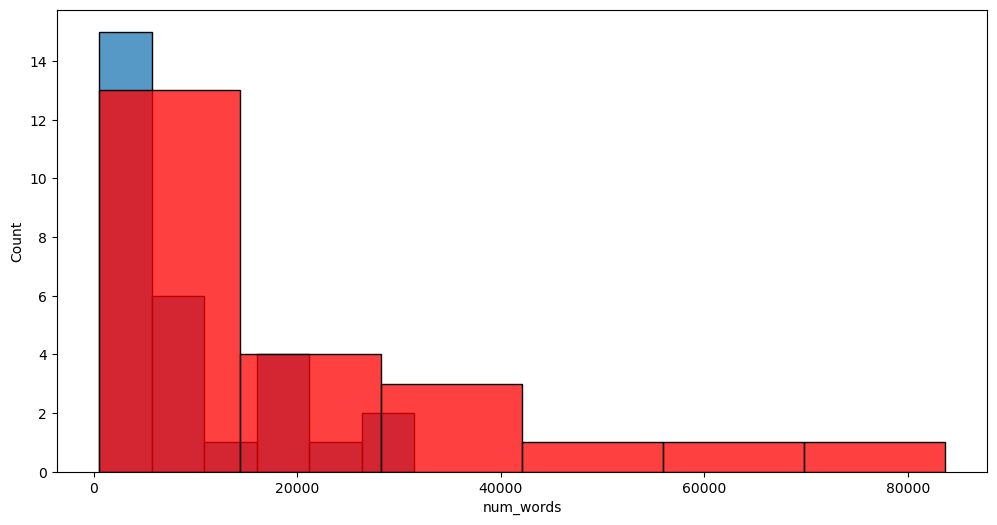

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


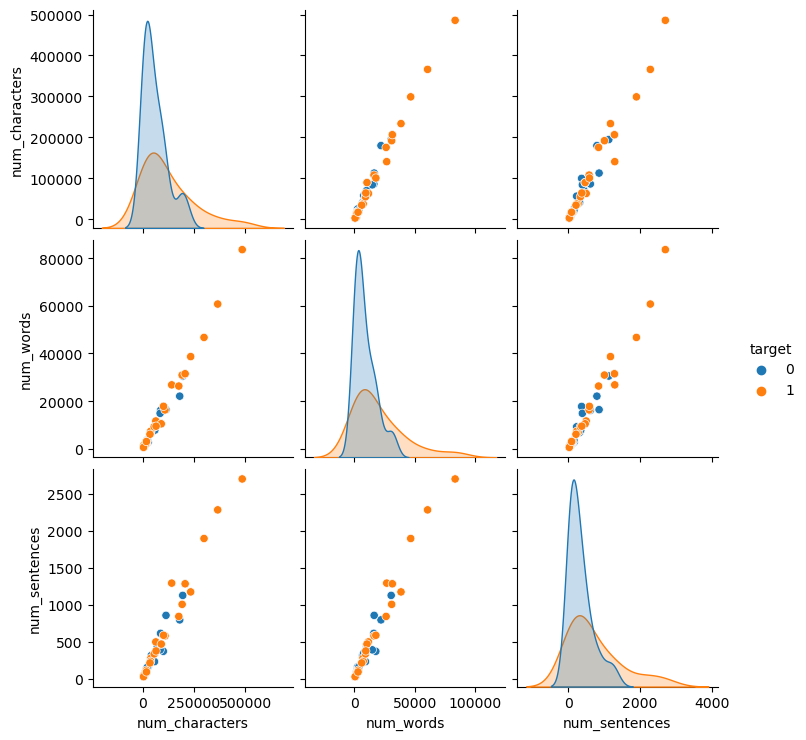

In [35]:
sns.pairplot(df,hue='target')

In [37]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: '\n\n\n\n\n\n\n\n\n\nPallabh Bhowmick vs The Ombudsman on 30 September, 2022\n\n\n\nShare Link\nMobile View\n\n\n\nPremium Members\nAdvanced Search\nCase Removal\n\n\n\n\n\n\n\n\n Cites 4 docs \n      \n      \nSection 7 in The Right To Information Act, 2005\nThe Right To Information Act, 2005\nSection 420 in The Indian Penal Code\nSection 417 in The Indian Penal Code\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nWarning on Translation\n\n\n\n\n\nTake notes as you read a judgment using our Virtual Legal Assistant and get email alerts whenever a new judgment matches your query (Query Alert Service). Try out our Premium Member services -- Free for one month.\n\nGauhati High Court\nPallabh Bhowmick vs The Ombudsman on 30 September, 2022                                                                  Page No.# 1/19\n\nGAHC010051612022\n\n\n\n\n                         THE GAUHATI HIGH COURT\n  (HIGH COURT OF ASSAM, NAGALAND, MIZORAM AND ARUNACHAL PRADESH)\n\n                         Case No. : WP(C)/1900/2022\n\n         PALLABH BHOWMICK\n         S/O LATE P.R. BHOWMICK, R/O HOUSE NO. 2, HILL SIDE COLONY, GATE\n         NO. 1, MALIGAON, GUWAHATI, P.O.-MALIGAON RAILWAY\n         HEADQUARTER, P.S.-JALUKBARI, PIN-781011\n\n\n\n         VERSUS\n\n         THE OMBUDSMAN, RESERVE BANK OF INDIA AND 3 ORS\n         STATION ROAD, GUWAHATI-781001\n\n         2:THE BRANCH MANAGER\n          STATE BANK OF INDIA\n          PANBAZAR\n          MG ROAD\n          KAMRUP(M)\n          PIN-781001\n\n         3:LOUIS PHILIPPE\n         A DIVISION OF ADITYA BIRLA FASHION AND RETAIL LIMITED\n          REPRESENTED BY ITS VICE PRESIDENT AND SALES DIRECTOR\n          HAVING ITS REGISTERED OFFICE AT DIVYASHREE 77 TOWN CENTRE\n          KH NO. 118/110/1\n          BUILDING 2\n         YEMALUR POST\n          BENGALURU-560037\n\n         4:PAPENDER KUMAR\n          C/O BHAGIRATH SINGH\n          R/O BIJNOR\n          UTTAR PRADESH-246764\n\n         5:DCP (CRIME)\n                                                                                     Page No.# 2/19\n\n             KAMRUP(M)\n\nFor the Petitioner:          Mr. Pallabh Bhowmick (petitioner in person).\n\nFor the Respondent:        Mr. A. Parvez, SC, SBI.\n                       THE HON\'BLE MR. JUSTICE SUMAN SHYAM\n\nDate of hearing            : 13/09/2022.\n\nDate of judgement          : 30/09/2022.\n\n                             JUDGEMENT AND ORDER (CAV)\n\n\n1.        Heard Mr. Pallab Bhowmick, the writ petitioner appearing in person. I have also\n\nheard Mr. A. Parvez, learned Standing Counsel, State Bank of India (SBI), appearing on behalf\n\nof the respondent no. 2 and Mr. D. Nath, learned Senior Government Advocate, Assam,\n\nappearing on behalf of the respondent no. 5. None has appeared for the other respondents.\n\n2.        By filing this writ petition, the petitioner, who is an Advocate practicing before this\n\ncourt, has primarily assailed the order dated 07/03/2022 (Annexure-11) issued by the\n\nrespondent no.1 i.e. the Ombudsman, Reserve Bank of India, Guwahati, rejecting the\n\ncomplaint made by the petitioner pertaining to the claim of refund of the fraudulent\n\ntransactions of Rs. 94,204/- made from his bank account on 18/10/2021.\n\n3.        The brief facts of the case, as projected through the pleadings, are that the\n\npetitioner is holding a Savings Bank (SB) Account bearing No. 10823993373 with the State\n\nBank of India(SBI), Guwahati Branch. The petitioner had made a online purchase of some\n\ngarment from the "Louis Philippe" store which he wanted to return and get the money back.\n\nOn 18/10/2021, the petitioner had received a call from a fraudster, who was later identified as\n\nthe respondent no. 4 viz Papendra Kumar from the State of Uttar Pradesh. Posing himself to\n                                                                                  Page No.# 3/19\n\nbe the customer care manager of the famous brand "Louis Philippe" i.e. the respondent no. 3,\n\nthe fraudster had asked the petitioner to download a \'mobile app\' for the purpose of making a\n\nrefund of Rs 4000/- in lieu of return of a garment earlier purchased by him. Bonafide\n\nbelieving that the call was from the customer care department of "Louis Philippe" the\n\npetitioner had downloaded the \'mobile app\'. Soon thereafter, a sum of Rs. 94,204/- was\n\nsiphoned off from the bank account of the petitioner by three separate online transactions.\n\nAn amount of Rs. 64,017/- was transferred from the bank account of the petitioner by\n\nPayment Gateway (PG) transactions. Immediately thereafter, two other transactions took\n\nplace for the amounts of Rs. 15,093/- each. As per the averments made in the writ petition,\n\nthe aforesaid fraudulent transactions took place on 18/10/2021 through mobile phones\n\nbearing numbers +91 7789956974 and +91 9188762299. The amounts were initially\n\ntransferred to the beneficiary account in the Federal Bank and thereafter, shifted to other\n\nbank accounts.\n\n4.        The petitioner claims that on 18/10/2021 itself, he had informed the customer care\n\ncentre of the SBI with a request to cancel the three transactions. Based on his information\n\nthe SBI customer care cell complaint bearing numbers 69889484 and 69689706 were\n\nregistered and the SBI debit card of the petitioner was also blocked. On 18/10/2021, the\n\npetitioner had lodged an FIR with the Jalukbari Police Station reporting the incident, based\n\non which, Jalukbari PS Case No. 1229/2021 was registered under Sections 417/420 of the\n\nIPC. On 19/10/2021, the petitioner had made a complaint before the Branch Manager,\n\nPanbazar Branch of the SBI informing him about the fraudulent transactions from his bank\n\naccount made on 18/10/2021.The petitioner had also lodged three complaints with the Cyber\n\nCrime Cell of Criminal Investigation Department (CID), Assam Police vide acknowledgement\n                                                                                  Page No.# 4/19\n\nnumbers 30410210067207, 30410210067210 and 30410210067509 pertaining to the three\n\ntransactions. It also appears that the petitioner had reported the matter to the National Cyber\n\nCrime Reporting Portal (NCCRP) of the Ministry of Home Affairs, which was also received vide\n\nacknowledgement No. 20410210143122. According to the petitioner, even after receipt of the\n\ncomplaint dated 19/10/2021, the respondent no. 2 bank did not take any action so as to\n\nprevent the fraudulent transactions or to recover the amount from the recipient bank.\n\n5.        On 16/01/2022, the petitioner had received an e-mail from the respondent no. 3\n\ninforming that there has been illegal breach of their customer database whereby, information\n\nregarding some of the customers were released in some cyber community and the same\n\nhappened during the period from 26/03/2021 to 01/12/2021. According to the respondent\n\nNo.3, the website of " Louis Philippe" was hacked when the petitioner had made online\n\npurchases on 05/10/2021.\n\n6.        The petitioner had also made an online complaint before the respondent no. 1 as\n\nper the Reserve Bank of India - Integrated Ombudsman Scheme, 2021. The petitioner\'s\n\ncomplaint was received vide acknowledgement No. 202122008004685 dated\n\n15/02/2022.After the complaint lodged by the petitioner was registered before the\n\nrespondent No1, the respondent No. 2 had sent an e-mail reply dated 24/02/2022, which was\n\nforwarded by the respondent no. 1 to the petitioner on 25/02/2022. In the said e-mail, it was\n\nmentioned that the complaint made by the petitioner had been received pertaining to the\n\nunauthorized transactions of Rs. 94,204/- done on 18/10/2021. On 04/03/2022, the petitioner\n\nwas also forwarded with a copy of the response received from the Federal Bank, wherein it\n\nwas mentioned that the fraudster i.e. the respondent no. 4 had his account bearing No.\n\n77770101374417, wherefrom one UPI transaction of Rs. 64,017/- was initiated from the\n                                                                                                Page No.# 5/19\n\naccount of the petitioner lying with the SBI and the amount was credited in the Neo Bank\n\nJupitar Savings Account operated in the name of the respondent no. 4. Thereafter, the\n\nrespondent no. 4 had transferred the above amounts to other bank accounts by means of UPI\n\ntransaction and as of now, there was no balance lying in the beneficiary account of the\n\nrespondent no. 4.\n\n7.          On 25/03/2022, the petitioner had submitted his response to the e-mail dated\n\n24/02/2022. On 07/03/2022, the Central Receipt and Processing Centre (CRPC) of the RBI\n\nhad sent the verdict of the respondent no. 1 with regard to the complaint of the petitioner\n\nholding that the Bank was not liable to compensate as the fraud took place due to the\n\nnegligence of the petitioner. The findings and observations at paragraph 2 of the order dated\n\n07/03/2022 would be relevant for the purpose of this case and, therefore, is being\n\nreproduced herein below for ready reference :-\n\n      "2.      The bank has submitted their version dated 24/02/2022 stating "the complaint pertains to the\n      unauthorized transaction of Rs. 94204/- done on 18/10/2021. The amount of Rs. 64017/- was\n      withdrawn via UPI and transferred to a Federal Bank beneficiary (attached). Amount of Rs. 30,186.8\n      was withdrawn via PG transaction. OTP logs are attached for the PG transactions. The UPI transaction\n      cannot be executed without the registered mobile number and secret MPIN. The PG transactions cannot\n      be executed without the card details and validation of OTP. We have to submit that the transactions\n      were executed due to the customer\'s negligence. As per circular No. RBI/2017-18/15 DBR\n      No.Leg.BC.78/09.07.005/2017-18 dated July 6, 2017 Section 7(i): In cases where the loss to the\n      customer is due to negligence by the customer, such as where he has shared the payment credentials,\n      the customer will bear the entire loss until he reports the unauthorized transactions to the Bank."\n      The query was raised with the SBI and they have replied now stating "The transactions were successful\n      and authorized via OTP and MPIN. Hence, the CRM complaint was closed as successful transactions.\n      The bank is not liable to pay any compensation as it was the customer\'s negligence due to which the\n      transaction took place. The bank would have been liable to pay had there been any further monetary\n      loss after reporting by the customer. There was no monetary loss after the customer reported to the\n      bank. Therefore, the customer\'s claim is not acceptable."\n      Hence, no deficiency could be attributed to the service of the bank under Clause 10 of the Reserve\n                                                                                    Page No.# 6/19\n\n       Bank- Integrated Ombudsman Schejme,2021."\n\n8.        The respondent No. 2 has filed counter-affidavit in this case inter- alia contending\n\nthat after receiving the complaint of fraud on 19/10/2021, the bank had taken necessary\n\naction. It has also been stated that the amount of Rs 64,017/- was withdrawn via UPI and\n\ntransferred to Federal Bank beneficiary. The amount of Rs 30,186/- was withdrawn via\n\nPayment Gateway (PG) transaction. The respondent No 2 has stated in the affidavit that UPI\n\ntransaction cannot be executed without registered mobile number and secret MPIN whereas,\n\ntransaction through PG cannot be completed without card details and validation through One\n\nTime Password (OTP). According to the respondent No.2 all the transactions were successful\n\nand authorized through OTP and MPIN. As such, the CRM complaint of the petitioner was\n\nclosed as successful transaction. The respondent number No. 2 has further contended that\n\nthe loss, if any, suffered by the petitioner was due to his own negligence in operation of UPI\n\nand PG transaction and therefore, the bank was not liable to compensate the petitioner.\n\n9.        Referring to the order dated 07/03/2022 passed by the respondent no.1, Mr.\n\nBhowmick has argued that although he had downloaded the \'mobile app\' under the\n\ncircumstances narrated in the writ petition,yet, he had never shared any OPT, password,\n\nMPIN or other credentials of his bank account with the fraudster. The money was transferred\n\non-line with the help of technology which was beyond his comprehension. Therefore, it is a\n\ncase of fraud and not case of negligence on his part. Mr. Bhowmick has also submitted that\n\nthe basis of the order dated 07/03/2022 is clearly erroneous. By referring to the Standing\n\nCircular of the Reserve Bank of India (RBI) pertaining to the liability of the Bank in such\n\nmatters, the petitioner has contended that since it is a clear case of fraud, hence, the bank\n                                                                                     Page No.# 7/19\n\nwould be liable to refund the amount.\n\n10.       Mr. Parvez, learned counsel for the respondent no. 2, on the other hand, has argued\n\nthat in case of UPI transactions, the Bank does not have any responsibility and the said\n\nposition would be established from the terms and conditions of UPI transactions, which is\n\nsigned by every customer. In so far as the subsequent two transactions involving a total\n\namount of Rs. 30,186.8 is concerned, Mr. Parvez submits that those were withdrawn via\n\nPayment Gateway (PG) transactions with the help of MPIN furnished by the petitioner.\n\nAccording to Mr. Parvez, the fraud took place due to the negligence of the petitioner\n\ninasmuch as he had shared the credentials of his account with the fraudster. Therefore, the\n\nBank did not have any liability in this case.\n\n11.       I have considered the rival submissions and have also gone through the materials\n\navailable on record.\n\n12.       It is the admitted position of fact that the petitioner was enjoying net banking\n\nfacility provided by the SBI in respect of his savings account. It is not in dispute that on\n\n18/10/2021, an amount of Rs. 94,204.80 was un-authorizedly transferred from the SBI\n\naccount of the petitioner through internet banking. There is also no dispute about the fact\n\nthat the three transactions, which took place on 18/10/2021, were all fraudulent transactions\n\nand the petitioner never intended to transfer any amount to the fraudster. The only issue that\n\nwould arise for decision of this Court in this case is as to whether the respondent no. 2 Bank\n\nwould be liable to compensate the petitioner for the loss of a sum of Rs. 94,204.80/- owing to\n\nthe fraudulent transaction or is it a case of negligence on the part of the petitioner.\n\n13.       Both the sides have placed heavy reliance on the Standing Circular of the RBI dated\n\n06/07/2017 in support of their respective claims. The petitioner has relied upon Clauses 9 and\n                                                                                                   Page No.# 8/19\n\n10 of the RBI Circular to submit that it was the Bank\'s responsibility to resolve the\n\ncontroversy in a time bound manner and having failed to do so, they would now have to\n\ncompensate the petitioner. The learned counsel for the respondent no. 2, on the other hand,\n\nhas relied upon clause-7 of the Circular to submit that the incident took place due to the\n\nnegligence of the customer and, therefore, the bank has no liability in the matter.\n\n14.          The RBI circular dated 06/07/2017 lays down certain guidelines for Customer\n\nprotection- limiting liability of the customers in case of Un-authorized Electronic Banking\n\nTransactions. The said circular is made applicable to all Commercial Banks, Small Finance\n\nBanks and Payments Banks. Clauses 7 to 10 of the circular dated 06/07/2017 would be\n\nrelevant for the purpose of this case and therefore, those are being reproduced here-in below\n\nfor ready reference :-\n\n15.          Clause -7 of the Circular dated 06/07/2017 reads as follows :-\n\n       "7.       A customer shall be liable for the loss occurring due to unathorised transactions in the following\n       cases:\n                 (i)        In cases where the loss is due to negligence by a customer, such as where he has\n                 shared the payment credentials, the customer will bear the entire loss until he reports the\n                 unauthorized transaction to the bank. Any loss occurring after the report of the unauthorized\n                 transaction shall be borne by the bank.\n                 (ii)      In case where the responsibility for the unauthorized electronic banking transaction\n                 lies neither with the bank nor with the customer, but lies elsewhere in the system and when\n                 there is a delay (four to seven working days after receiving the communication from the bank)\n                 on the part of the customer in notifying the bank of such a transaction, the per transaction\n                 liability of the customer shall be limited to the transaction value or the amount mentioned in\n                 Table 1, whichever is lower.\n                                                              Table 1\n                                      Maximum Liability of a Customer under Paragraph 7(ii)\n\nType of Account                                             Maximum liability (Rs)\n·     BSBD Accounts                                         5,000\n·     All other SB Accounts\n                                                                                                         Page No.# 9/19\n\n    ·        Pre-paid Payment Instruments and Gift Cards.\n    ·        Current/Cash Credit/Overdraft Accounts of MSMEs 10,000\n    ·        Current Accounts/Cash Credit/Overdraft Accounts\n    of Individuals with annual average balance (during 365\n    days preceding the incidence of fraud)/limit up to Rs. 25\n    lakhs.\n    ·        Credit cards with limit up to Rs. 5 lakhs\n    ·        All other Current/Cash Credit/Overdraft Accounts.    25,000\n    ·        Credit cards with limit above Rs. 5 lakhs\n\n\n                      Further, if the delay in reporting is beyond seven working days, the customer liability shall be\n                      determined as per the Bank\'s Board approved policy. Banks shall provide the details of their\n                      policy in regard to customers\' liability formulated in pursuance of these directions at the time of\n                      opening the accounts. Banks shall also display their approved policy in public domain for wider\n                      dissemination. The existing customers must also be individually informed about the bank\'s\n                      policy. "\n\n16. Clause 8 reads as follows:-\n\n              "8.      Overall liability of the customer in third party breaches, as detailed in paragraph 6(ii) and\n                      paragraph 7(ii) above, where the deficiency lies neither with the bank nor with the customer but\n                      lies elsewhere in the system, is summarized in the Table 2 :\n\n                                                                  Table 2\n                                                    Summary of Customer\'s Liability\n\n    Time taken to report the fraudulent transaction          Customer\'s Liability (Rs)\n    from the date of receiving the communication\n    Within 3 working days                                    Zero liability\n    Within 4 to 7 working days                               The transaction value or the amount mentioned in\n                                                             Table 1, whichever is lower.\n    Beyond 7 working days                                    As per bank\'s Board approved policy.\n\n\n\n                      The number of working days mentioned in Table 2 shall be counted as per the working schedule\n\n                      of the home branch of the customer excluding the date of receiving the communication .\n\n   17.           Clause 9 lays down as follows :-\n\n               Reversal Timeline for Zero Liability/Limited Liability of customer\n                                                                                                  Page No.# 10/19\n\n                9.      On being notified by the customer, the bank shall credit (shadow reversal) the amount\n                involved in the unauthorized electronic transaction to the customer\'s account within 10 working\n                days from the date of such notification by the customer (without waiting for settlement of\n                insurance claim, if any). Banks may also at their discretion decided to waive off any customer\n                liability in case of unauthorized electronic bank transaction even in cases of customer\n                negligence. The credit shall be value dated to be as of the date of the unauthorized\n                transaction."\n\n18.       Clause -10 of the RBI circular casts certain duties upon the bank, which are\n\nas follows :-\n\n       "10. Further, banks shall ensure that :\n\n                        (i)        A complaint is resolved and liability of the customer, if any, established within\n                        such time, as may be specified in the bank\'s Board approved policy, but not exceeding\n                        90 days from the date of receipt of the complaint, and the customer is compensated as\n                        per provisions of paragraphs 6 to 9 above;\n                        (ii)       Where it is unable to resolve the complaint or determine the customer\n                        liability, if any, within 90 days, the compensation as prescribed in paragraphs 6 to 9 is\n                        paid to the customer; and\n                        (iii)      In case of debit card/bank account, the customer does not suffer loss of\n                        interest, and in case of credit card, the customer does not bear any additional burden\n                        of interest."\n\n19.       From a reading of the relevant provisions of the RBI circular what can be seen is\n\nthat clause 8 deals with third party breaches where the deficiency lies neither with the Bank\n\nnor with the customer but lies elsewhere in the system. As per Clause 6(ii), the liability of the\n\ncustomer in such cases would be zero when the customer notifies the bank within three\n\nworking days of receiving the communication from the bank regarding un-authorized\n\ntransaction.\n\n20.        "Third party breach" is not a defined expression under the RBI circular dated\n\n06/07/2017. Yet, it appears from the plain language employed in clause-8 that in case of un-\n                                                                                     Page No.# 11/19\n\nauthorized electronic banking transaction occurring due to third party breaches i.e where the\n\ndeficiency neither lies with the customer or the bank, the customer liability will be "zero" if\n\nthe fraudulent transaction is reported within three working days from the date on which the\n\ncustomer receives the communication. In the present case, even if it is assumed that the\n\nfraudulent transaction had taken place due to "third party breach" i.e. breach in the customer\n\ndata base of the respondent No 3, even then, the fraud/ un-auhtoriozed transaction was\n\nreported to the Bank on 19/10/2021 i.e within one working day. Therefore, as per clause -8\n\nof the RBI circular, the liability of the customer/ writ petitioner in this case ought to be "zero".\n\n21.       As per clause 9, which deals with reversal timeline of zero liability/ limited liability of\n\ncustomers in case of unauthorized electronic banking transaction, it would be the discretion\n\nof the bank to waive off any customer liability even in case of negligence of the customer.\n\nFrom a conjoint reading of the aforementioned clauses of the circular, it can be inferred that\n\nin case of un-authorized electronic transactions the Bank would have a duty to reverse the\n\npayment and credit the amount involved in the un-authorized transaction within a time frame,\n\nprovided the fraudulent transaction is reported by the Customer within the time frame\n\nprovided in the Circular. In an appropriate case, even the negligence, if any, on the part of\n\nthe customer, can be waived by the Bank.\n\n22.       From the pleadings available on record it is evident that the three online\n\ntransactions from the petitioners account took place on 18/10/2021 when he had downloaded\n\nthe \'mobile app\' on being prompted by the fraudster. The petitioner had done so in order to\n\nget refund of his money from " Louis Philippe". The aforesaid three transactions were\n\nevidently unauthorized as the petitioner never intended to transfer any amount to the\n\nrespondent No. 4 by downloading the mobile app. The respondent No. 2 has also not denied\n                                                                                     Page No.# 12/19\n\nthat the transaction was unauthorized. Therefore, merely because the petitioner had\n\ndownloaded the mobile app, that cannot by itself lead to the presumption of negligence on\n\nthe part of the petitioner in assisting the unauthorized transaction. Had the Bank installed\n\neffective cyber security system and online fraud control measures then in that event, even if a\n\nmobile app is downloaded by a customer, money could not have been transferred from the\n\nbank account without proper authorization. Regardless of whether it was a UPI or PG\n\ntransaction, it is not believable that the petitioner would deliberately share his OTP, password\n\nand MPIN so as to allow his hard earned money to be siphoned off from the bank account by\n\na fraudster, that too, on three consecutive occasions, in quick successions. Rather, the\n\nincident appears to be pure and simple case of cyber crime whereby, the fraudster had\n\nhacked the database of respondent No. 3 and thereafter, got access to sensitive information\n\npertaining to various customers of "Louis Philippe" including the petitioner which information\n\nwas used for completing the fraudulent transactions. The participation on the part of the\n\npetitioner appears to be only to the extent of downloading the mobile app. Although the\n\nrespondent No. 2 has contended that the petitioner had shared OTP, password and MPIN with\n\nthe fraudster, yet, the said claim could not be substantiated by the Bank. Nothing has been\n\nstated in the counter-affidavit filed by the respondent No. 2 to indicate as to when, how and\n\nin what manner the OTP, MPIN and password was shared by the petitioner with the fraudster.\n\nNo material particulars of the complicity on the part of the petitioner have been furnished in\n\nthe affidavit. Therefore, this court is of the view that the respondent No. 2 Bank has\n\ncompletely failed to establish any negligence on the part of the writ petitioner.\n\n23.      In the affidavit filed by the respondent No 2 it has been stated that on receipt of the\n\ncomplaint dated 19/10/2021, the Bank had taken necessary action. However, there is nothing\n                                                                                   Page No.# 13/19\n\non record to substantiate the above stand of the Bank. It is surprising that even after receipt\n\nof written complaint of fraudulent electronic transaction from the account of the petitioner,\n\nnot even an FIR was lodged by the Bank with the police. It is also the admitted position of\n\nfact that the Bank did not make any \'charge back\' request to the beneficiary bank soon after\n\nreceipt of the intimation about the fraud from the petitioner on 18/10/2021 or even on receipt\n\nof the complaint dated 19/10/2021. As a matter of fact, it appears that after receipt of the\n\ncomplaint from the petitioner on 19/10/2021 the respondent No. 2 has not taken any action\n\nin the matter to protect the interest of its customer i.e. the petitioner here-in. Not even a\n\ncomplaint was lodged by the Bank with the cyber crime cell. Notwithstanding the same, in its\n\nreply to the respondent No.1, the Bank has alleged negligence on the part of the customer\n\nthereby denying any liability in the matter.\n\n24.      It is to be noted herein that online banking facility is a relatively new phenomenon\n\nin India. By providing online banking facility to the customers, the Banks have not only made\n\nit much easier for the customers to access their accounts and to carry out online transactions\n\nbut the same has also given a boost to banking business as a whole due to substantial\n\nincrease in the volume of online transactions. As such, the Banks are also the direct\n\nbeneficiary of the internet banking system. Due to the online banking facility, incidents of\n\ncyber crime involving fraudulent banking transactions are also increasing at an alarming rate.\n\nWhile the majority of the individual customers using online banking are still to come to terms\n\nwith the various facets of internet banking related frauds, the fraudsters and the cyber\n\ncriminals, who are technologically far more advanced, are having a field day. The cyber\n\ncriminals are employing new methodologies every day to dupe the gullible internet users.\n\nUnder the circumstances, the primary responsibility to provide adequate cyber security so as\n                                                                                  Page No.# 14/19\n\nto protect the interest of the customers using online banking facility would always be with the\n\nBank. Recognizing the above responsibility of the Banks, clause- 4 of the RBI circular dated\n\n06/07/2017 has laid down certain guidelines to be followed by the Banks for the safety of the\n\ncustomers using online banking facility. Such guidelines include the necessity of putting in\n\nplace a robust and dynamic fraud detection and prevention mechanism. There is no mention\n\nin the affidavit filed by the respondent No 2 as to what cyber security measures have been\n\nput in place by the Bank to prevent cyber crime.\n\n25.       It is no doubt correct that if a customer is negligent in handling his or her account\n\nand discloses sensitive information such as, password, OTP, MPIN, Card Number etc. resulting\n\ninto fraudulent transaction, the Bank cannot be held liable for loss, if any suffered by the\n\ncustomer. However, in such cases, negligence on the part of the customers must be cogently\n\nestablished by the Bank by bringing reliable materials on record. The Banks cannot absolve\n\nthemselves of the liability towards losses suffered by the customers on account of\n\nunauthorized electronic transactions based on perceived negligence of the customers. Having\n\nregard to the facts and circumstances of this case as well as the materials available on record\n\nthis court is of the opinion that the respondent No. 2 has failed to establish negligence on the\n\npart of the petitioner leading to the fraudulent transaction.\n\n26.      An issue of similar nature fell for consideration before the Hon\'ble Supreme Court in\n\nthe case of DAV Public School Vs. The Senior Manager, Indian Bank, Midnapore\n\nBranch and others reported in (2019) 20 SCC 31. That was also a case where the\n\nfraudster had siphoned of a sum of Rs. 30 lakhs from the bank account of the School. The\n\nPrincipal of the DAV Public School had lodged a complaint regarding deficiency of service\n\nagainst the respondent bank by alleging that the school\'s bank accounts without net-banking\n                                                                                             Page No.# 15/19\n\nfacility, were unauthorizedly linked with the personal Customer Information File(CIF) of the\n\nPrincipal of the School, facilitating online transaction, which had led to fraudulent siphoning of\n\nRs. 30 lakhs from the school\'s account. The fraudulent transaction was detected when one of\n\nthe school\'s employees went to the bank for updating the Passbook. Then, it was found that\n\na sum of Rs. 25 lakhs was unauthorizedly transferred from the School\'s account. The said\n\ntransaction was brought to the notice of the Branch Manager on 09/09/2014 itself but the\n\nBranch Manager advised the school staff to visit the bank again on the next morning but in\n\nthe meantime, another amount of Rs. 5 lakhs was transferred from the School\'s account\n\nbefore the account could be blocked. A complaint was filed by the school authorities before\n\nthe State Consumer Dispute Redressal Commission of West Bengal. The State Commission\n\nhad held that School Principal of the School cannot escape his liability but the Bank was also\n\nliable. It was held that the Bank had failed to safeguard the money of the School.\n\nAccordingly, partial relief was granted to the School by ordering payment of compensation of\n\nRs. 1,00,000/- with cost of Rs. 10,000/-. The National Consumer Dispute Redressal Forum\n\nhad dismissed the appeal filed against the said order of the State Commission. The matter\n\nthen went up to the Supreme Court. The petitioner took a plea before the Supreme Court\n\nthat it had never opted for net banking facility in respect of the 3 (three) bank accounts of\n\nthe School. Therefore, there was gross error on the part of the bank in linking the accounts\n\nwhich had led to the siphoning of the money from the School\'s account. A question arose as\n\nto whether, without linking the net-banking facility, any money from the account of the School\n\ncould have been siphoned out by the miscreants. While answering the question, the Supreme\n\nCourt has made the following observation in paragraph 13 of the judgement :-\n\n       "13. In the above backdrop, the key question to be considered here is whether, without the school\'s\n                                                                                                Page No.# 16/19\n\n       account being linked with net banking facility, any money from the bank account could have been\n       siphoned out by the miscreants. The obvious answer to this question has to be in the negative. As\n       concurrently found by the State Commission, the Banking Ombudsman and also by the NCDRC, the\n       bank has rendered themselves liable by enabling net banking facility by linking the individual account of\n       the school\'s Principal, to the school\'s account. The only reason why the State Commission as well as the\n       NCDRC had limited the compensation sum to Rs. 1,00,000/-was because of the perceived complicity of\n       the Principal. But the charge sheet filed by the police reveals how the fraudulent transaction was made\n       by the two charge sheeted accused and more importantly the police did not find complicity of the\n       Principal of the school, with those fraudulent transactions. The Banking Ombudsman too declared that\n       the Bank was at fault which facilitated the loss to the School but declined to order refund as the\n\n       demanded sum (Rs 30,00,000/-) was beyond the pecuniary jurisdiction of the Banking Ombudsman ."\n\nAccordingly, the sum of Rs. 25 lakhs siphoned out from the bank account of the School was\n\ndirected to be refunded to the School\'s Account.\n\n27.       An issue of somewhat similar nature, came up for consideration before this Court in\n\nthe case of Justice (Retired) Basudev Agarwal Vs. State Bank of India [WP(C)\n\n3474/2022], which was disposed of by order dated 04/02/2022 passed by the learned\n\nSingle Judge. In that case also, fraudulent transaction of Rs. 5,99,000/- had taken place from\n\nthe SB Account of the petitioner. On receiving SMS in his Mobile Phone regarding the above\n\ntransaction, the petitioner immediately made a complaint before the Branch Manager of the\n\nrespondent no. 2 and had also lodged an FIR with the Dispur Police Station. But the bank had\n\ndenied its liability by seeking refuge under clause-7 of the RBI Circular dated 06/07/2017\n\nregarding limited liability of the customer. By rejecting the stand of the bank, the learned\n\nSingle Judge had allowed the writ petition with a direction upon the respondent no. 2 to\n\ndeposit the said amount on the account of the petitioner along with interest. The learned\n\nSingle Judge has observed that the allegation made by the bank that the petitioner had\n\nshared user-ID, Pass-word etc. and did not report the fraud on receipt of the SMS, was not\n\ncorrect as the materials on record, more particularly, the information received by the\n                                                                                    Page No.# 17/19\n\npetitioner under the RTI Act, 2005, which went to show that immediately after receipt of the\n\ncomplaint, the amount of Rs. 5,99,000/- was put on hold by the bank and, therefore, the\n\ntransaction did not go through. It was held that under the circumstances, the petitioner could\n\nnot have been penalized by withholding the said amount. The judgement and order dated\n\n04/02/2022 has been upheld by the Division Bench by order dated 13/05/2022 passed in\n\nconnection with WA No. 119/2022.\n\n28.       In order to ascertain as to what action has been taken by the Police in carrying out\n\ninvestigation in connection with Jalukbari P.S. Case No 1229/2021, this Court had directed the\n\nDCP(Crime), Guwahati to appear personally along with the relevant records. Accordingly, Sri\n\nMrinal Talukdar, DCP (Crime) had appeared in the court on 13/09/2022. After interacting with\n\nthe Police Officer, it transpired that save and except writing some letters, the Police has failed\n\nto achieve any worthwhile breakthrough in the investigation even after nearly a year since\n\nthe FIR was registered. This is notwithstanding the fact that the fraudster has not only been\n\nidentified but his personal details including the photograph has also been furnished by the\n\nFederal Bank. The above developments are clear pointers towards the sorry state of affairs\n\nprevailing in the department when it comes to investigating cyber crimes.\n\n29.       In the above context, it would be pertinent to note herein that the petitioner has\n\nstated in the writ petition that the respondent no. 3 has admitted that there was a breach of\n\nits customer database. If such breach of the customers\' database has given access to the\n\nfraudster to the petitioner\'s account, then in that event, there can be no doubt about the fact\n\nthat the respondent no. 3 would also be liable to compensate the petitioner or the Bank, as\n\nthe case may be. However, as noted above, the police report indicating the manner in which\n\nthe fraud has been committed is not yet available nor is there any report from the beneficiary\n                                                                                    Page No.# 18/19\n\nbank indicating the manner in which the respondent no. 4 had siphoned off the money from\n\nthe Bank to the other accounts. These are matters of investigation by the competent\n\nauthority. A clear picture in these matters would emerge only when a proper investigation is\n\ncarried out and the report is made available. On completion of investigation if it is established\n\nthat the fraud took place purely due to the negligence or deficiency of service on the part of\n\nthe respondent no. 3, than in that event the entire liability may be on the respondent No 3.\n\n30.       In the light of the discussion made above, it is, therefore, held that the online\n\ntransactions that took place from the petitioner\'s bank account on 18/10/2021 were\n\nunauthorized and fraudulent in nature. Negligence on the part of petitioner could not be\n\nestablished by the respondent No. 2. Therefore, the conclusion drawn by the respondent No.\n\n1 in its order dated 07/03/2022 was without any basis and hence, liable to be set-aside. This\n\ncourt is also of the opinion that the present case will come within the ambit of clauses 8 and\n\n9 read with clause 10 of the RBI Circular dated 06/07/2017 referred to above. As such, the\n\npetitioner will not have any liability in the matter. Consequently, it will be for the respondent\n\nNo. 2 Bank to reverse the payments in the saving bank account of the writ petitioner with\n\nliberty to recover the same from the respondent No. 3 by initiating appropriate legal\n\nproceedings, if so advised.\n\n31.       For the reasons stated above, the impugned order dated 07/03/2022 issued by the\n\nrespondent No. 1 stands set aside.\n\n32.       The respondent No.2 is directed to deposit the amount of Rs. 94,204.80 in the bank\n\naccount of the writ petitioner within 30 (thirty) days from the date of receipt of a certified\n\ncopy of this order, with liberty to recover the amount from the respondent No 3. The prayer\n\nfor grant of interest on the above amount made by the petitioner is declined. It is, however,\n                                                                                 Page No.# 19/19\n\nmade clear that if the amount, as directed by this court, is not deposited in the bank account\n\nof the petitioner by the respondent No 2 within the time specified above, then in that event,\n\nthe amount would carry interest @ 9% per annum with effect from the date of this order\n\nuntil realization.\n\n      With the above observations and directions, this writ petition stands disposed of.\n\nThere would be no order as to costs.\n\n\n                                                                                           JUDGE\n\nSukhamay\n\n\n\n\nComparing Assistant\n \n\n\n\n\n\n\n\n\n\n\n\n'

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [57]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/supornosarkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [59]:
df['text'][10]

'\n\n\n\n\n\n\n\n\n\nShiv Kumar vs The State Of Bihar on 1 February, 2022\n\n\n\nShare Link\nMobile View\n\n\n\nPremium Members\nAdvanced Search\nCase Removal\n\n\n\n\n\n\n\n\n Cites 20 docs \n      \n        - [View All]\n      \n      \nThe Income- Tax Act,   1995\nThe Code Of Criminal Procedure,   1973\nSection 156 in The Income- Tax Act,   1995\nSection 36 in The Code Of Criminal Procedure,   1973\nSection 154 in The Code Of Criminal Procedure,   1973\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nWarning on Translation\n\n\n\n\n\nTake notes as you read a judgment using our Virtual Legal Assistant and get email alerts whenever a new judgment matches your query (Query Alert Service). Try out our Premium Member services -- Free for one month.\n\nPatna High Court - Orders\nShiv Kumar vs The State Of Bihar on 1 February, 2022         IN THE HIGH COURT OF JUDICATURE AT PATNA\n                 CRIMINAL MISCELLANEOUS No.38807 of 2020\n        Arising Out of PS. Case No.-163 Year-2020 Thana- WARISLIGA

In [60]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [61]:
df['transformed_text'] = df['text'].apply(transform_text)

In [62]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,\n\n\n\n\n\n\n\n\n\nPallabh Bhowmick vs The Om...,0,40993,6830,313,pallabh bhowmick vs ombudsman 30 septemb 2022 ...
1,\n\n\n\n\n\n\n\n\n\nSanjay Singh vs State Of U...,0,3117,552,26,sanjay singh vs state anoth 6 februari 2023 sh...
2,\n\n\n\n\n\n\n\n\n\nSukdeen Khan vs State Of U...,0,5948,1095,35,sukdeen khan vs state 21 decemb 2022 share lin...
3,\n\n\n\n\n\n\n\n\n\nRinku Singh @ Deepak Kumar...,0,58272,7821,344,rinku singh deepak kumar deepak vs state bihar...
4,\n\n\n\n\n\n\n\n\n\nDaksh vs Unknown on 1 July...,0,18343,3084,139,daksh vs unknown 1 juli 2013 share link mobil ...


In [63]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [65]:
not_cybercrime_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

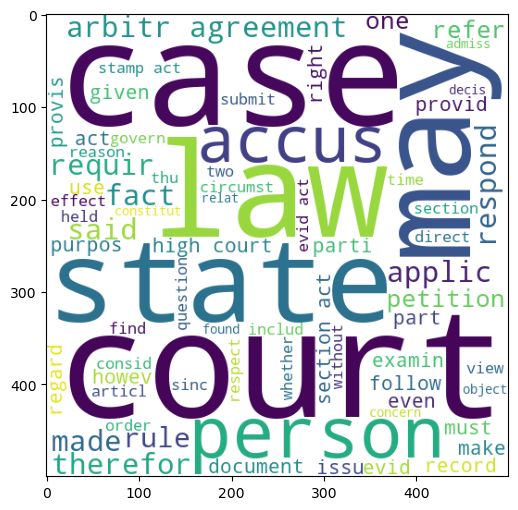

In [66]:
plt.figure(figsize=(15,6))
plt.imshow(not_cybercrime_wc)

In [67]:
 cybercrime_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

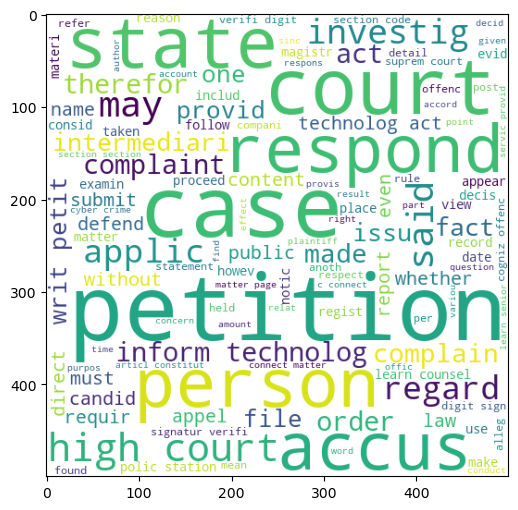

In [68]:
plt.figure(figsize=(15,6))
plt.imshow(cybercrime_wc)

In [69]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,\n\n\n\n\n\n\n\n\n\nPallabh Bhowmick vs The Om...,0,40993,6830,313,pallabh bhowmick vs ombudsman 30 septemb 2022 ...
1,\n\n\n\n\n\n\n\n\n\nSanjay Singh vs State Of U...,0,3117,552,26,sanjay singh vs state anoth 6 februari 2023 sh...
2,\n\n\n\n\n\n\n\n\n\nSukdeen Khan vs State Of U...,0,5948,1095,35,sukdeen khan vs state 21 decemb 2022 share lin...
3,\n\n\n\n\n\n\n\n\n\nRinku Singh @ Deepak Kumar...,0,58272,7821,344,rinku singh deepak kumar deepak vs state bihar...
4,\n\n\n\n\n\n\n\n\n\nDaksh vs Unknown on 1 July...,0,18343,3084,139,daksh vs unknown 1 juli 2013 share link mobil ...


In [70]:
not_cybercrime_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        not_cybercrime_corpus.append(word)
        

In [71]:
len(not_cybercrime_corpus)

205215

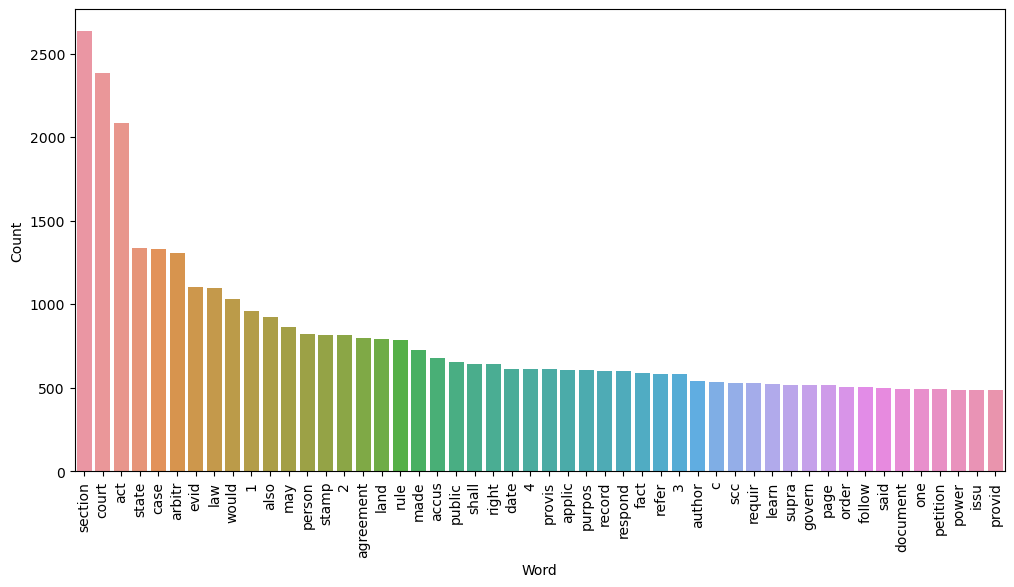

In [72]:
from collections import Counter
word_counts = Counter(not_cybercrime_corpus)

# Create a DataFrame from the Counter
df_word_counts = pd.DataFrame(word_counts.most_common(50), columns=['Word', 'Count'])

# Plot the bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [73]:
cybercrime_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        cybercrime_corpus.append(word)

In [74]:
len(cybercrime_corpus)

112643

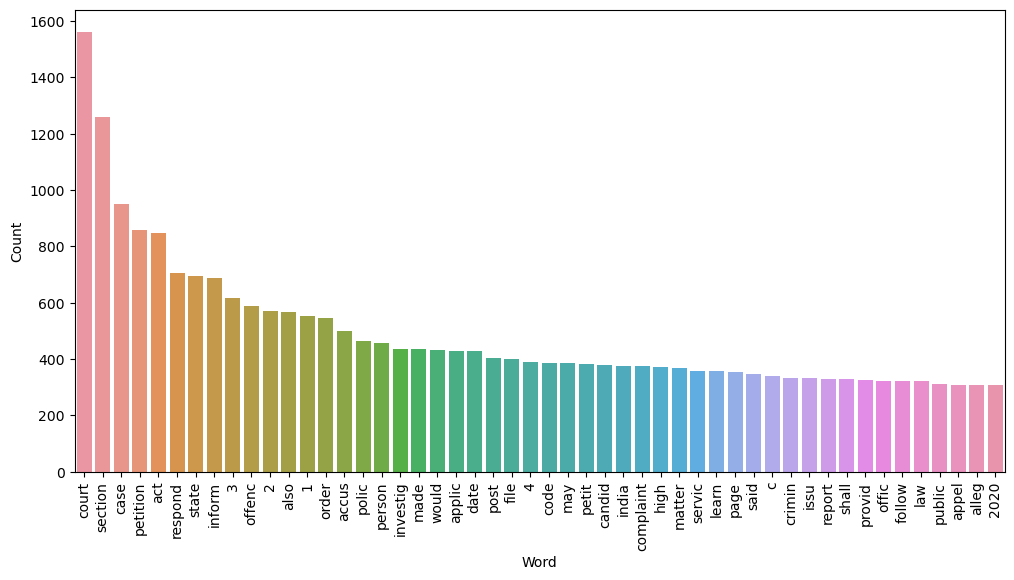

In [75]:
from collections import Counter
word_counts = Counter(cybercrime_corpus)

# Create a DataFrame from the Counter
df_word_counts = pd.DataFrame(word_counts.most_common(50), columns=['Word', 'Count'])

# Plot the bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [76]:
# Text Vectorization
# using Bag of Words
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,\n\n\n\n\n\n\n\n\n\nPallabh Bhowmick vs The Om...,0,40993,6830,313,pallabh bhowmick vs ombudsman 30 septemb 2022 ...
1,\n\n\n\n\n\n\n\n\n\nSanjay Singh vs State Of U...,0,3117,552,26,sanjay singh vs state anoth 6 februari 2023 sh...
2,\n\n\n\n\n\n\n\n\n\nSukdeen Khan vs State Of U...,0,5948,1095,35,sukdeen khan vs state 21 decemb 2022 share lin...
3,\n\n\n\n\n\n\n\n\n\nRinku Singh @ Deepak Kumar...,0,58272,7821,344,rinku singh deepak kumar deepak vs state bihar...
4,\n\n\n\n\n\n\n\n\n\nDaksh vs Unknown on 1 July...,0,18343,3084,139,daksh vs unknown 1 juli 2013 share link mobil ...


## 4. Model Building

In [77]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [78]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [470]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [483]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [79]:
X.shape

(52, 3000)

In [80]:
y = df['target'].values

In [81]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)

In [94]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [95]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [96]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.6666666666666666
[[1 0]
 [2 3]]
1.0


In [97]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.16666666666666666
[[1 0]
 [5 0]]
0.0


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.6666666666666666
[[1 0]
 [2 3]]
1.0


In [493]:
# tfidf --> MNB

In [99]:
!pip install xgboost

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [100]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [101]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [102]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [103]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.3333333333333333, 1.0)

In [105]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.3333333333333333
Precision -  1.0
For  KN
Accuracy -  0.5
Precision -  1.0
For  NB
Accuracy -  0.16666666666666666
Precision -  0.0
For  DT
Accuracy -  0.8333333333333334
Precision -  1.0
For  LR
Accuracy -  0.16666666666666666
Precision -  0.0
For  RF
Accuracy -  0.6666666666666666
Precision -  1.0


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  AdaBoost
Accuracy -  0.5
Precision -  1.0
For  BgC
Accuracy -  0.8333333333333334
Precision -  1.0
For  ETC
Accuracy -  0.6666666666666666
Precision -  1.0
For  GBDT
Accuracy -  0.8333333333333334
Precision -  1.0
For  xgb
Accuracy -  0.8333333333333334
Precision -  1.0


In [106]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [107]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.333333,1.0
1,KN,0.500000,1.0
3,DT,0.833333,1.0
5,RF,0.666667,1.0
6,AdaBoost,0.500000,1.0
7,BgC,0.833333,1.0
8,ETC,0.666667,1.0
9,GBDT,0.833333,1.0
10,xgb,0.833333,1.0
2,NB,0.166667,0.0


In [110]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [111]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.333333
1,KN,Accuracy,0.500000
2,DT,Accuracy,0.833333
3,RF,Accuracy,0.666667
4,AdaBoost,Accuracy,0.500000
5,BgC,Accuracy,0.833333
6,ETC,Accuracy,0.666667
7,GBDT,Accuracy,0.833333
8,xgb,Accuracy,0.833333
9,NB,Accuracy,0.166667


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


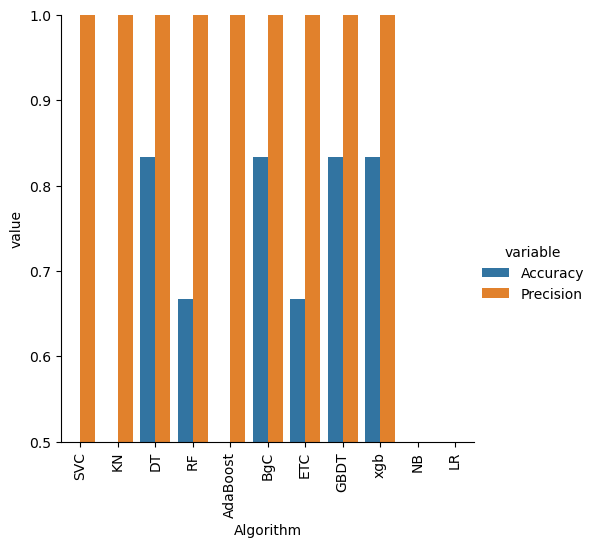

In [112]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [113]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [114]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [115]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [116]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [117]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [118]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.333333,1.0,0.333333,1.0,0.333333,1.0,0.333333,1.0
1,KN,0.500000,1.0,0.500000,1.0,0.500000,1.0,0.500000,1.0
2,DT,0.833333,1.0,0.833333,1.0,0.833333,1.0,0.833333,1.0
3,RF,0.666667,1.0,0.666667,1.0,0.666667,1.0,0.666667,1.0
4,AdaBoost,0.500000,1.0,0.500000,1.0,0.500000,1.0,0.500000,1.0
5,BgC,0.833333,1.0,0.833333,1.0,0.833333,1.0,0.833333,1.0
6,ETC,0.666667,1.0,0.666667,1.0,0.666667,1.0,0.666667,1.0
7,GBDT,0.833333,1.0,0.833333,1.0,0.833333,1.0,0.833333,1.0
8,xgb,0.833333,1.0,0.833333,1.0,0.833333,1.0,0.833333,1.0
9,NB,0.166667,0.0,0.166667,0.0,0.166667,0.0,0.166667,0.0


In [119]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [120]:
voting = VotingClassifier(estimators=[('svm', svc), ('DT', dtc), ('et', etc)],voting='soft')

In [121]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('DT', DecisionTreeClassifier(max_depth=5)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [122]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8333333333333334
Precision 1.0


In [123]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [124]:
from sklearn.ensemble import StackingClassifier

In [125]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [126]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8333333333333334
Precision 1.0


In [131]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(dtc,open('model.pkl','wb'))
with open('model.pkl', 'wb') as model_file:
    pickle.dump(dtc, model_file)

# Loading the model
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Checking if the loaded model is of type MultinomialNB
print(isinstance(loaded_model, MultinomialNB))

# Checking the parameters of the loaded model
print("Loaded Model Parameters:", loaded_model.get_params())

False
Loaded Model Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
